# Image Art

Inspired by that one thing I saw in the UMSL Collabitat - my attempt at taking an image and transforming it in ways that are interesting to look at.

In [2]:
import numpy as np
from PIL import Image # import Pillow

from random import *

In [3]:
# load an image
filename = "images/stl1.jpeg"
with Image.open(filename) as img:
    img.load()

print(type(img))

isinstance(img, Image.Image)

<class 'PIL.JpegImagePlugin.JpegImageFile'>


True

## Display the image

In [4]:
# display the image in system native format (pop up window on mac)
# img.show()

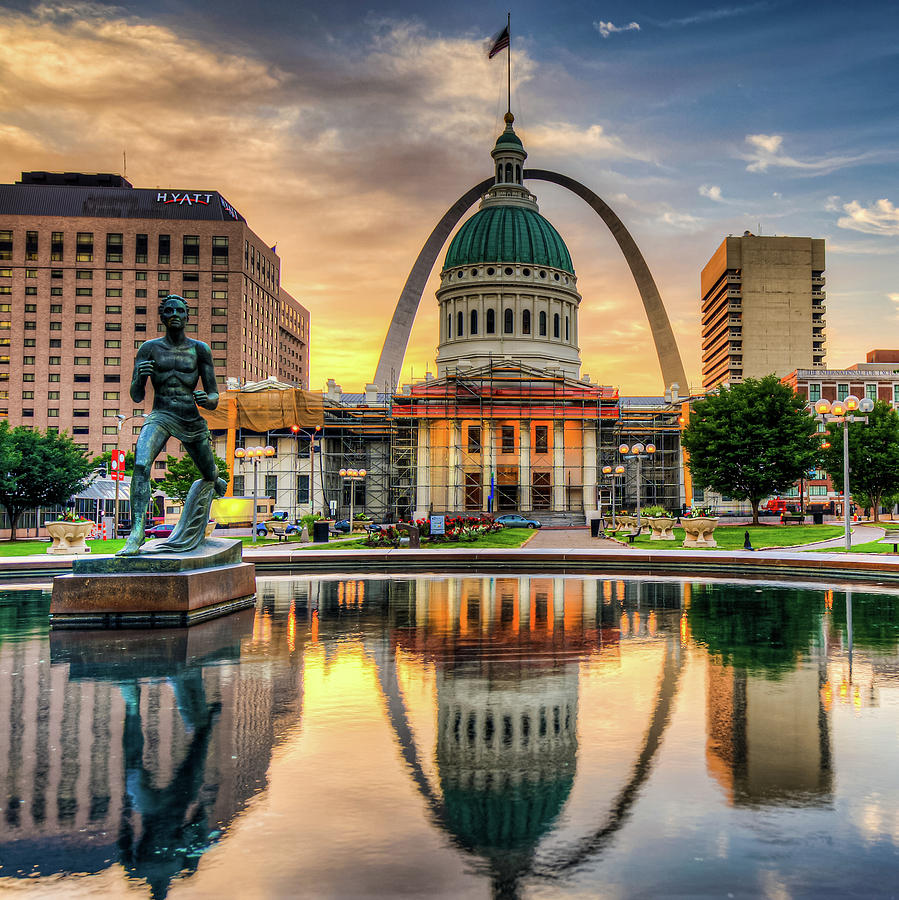

In [5]:
# display the image in notebook
display(img)

In [6]:
# convert to numpy array
img_array = np.asarray(img)

In [7]:
# print details
height,width,bands = img_array.shape
print("y dim = {}".format(height))
print("x dim = {}".format(width))
print("bands = {}".format(bands))

y dim = 900
x dim = 899
bands = 3


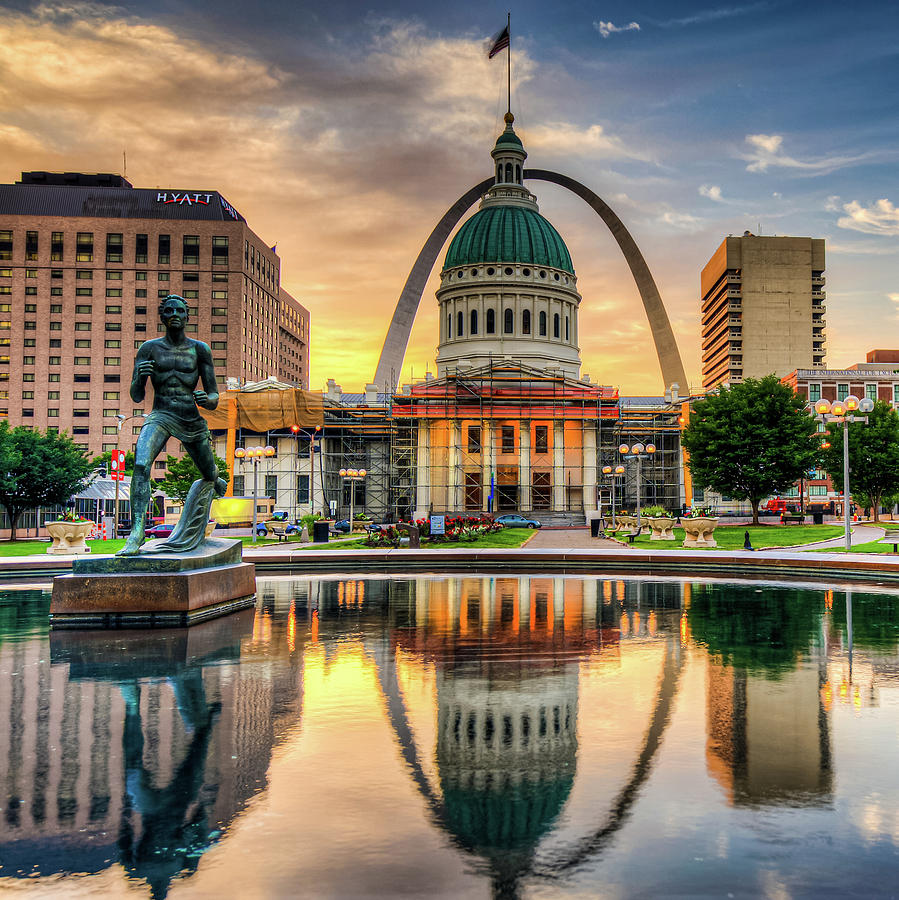

In [8]:
# convert numpy array back to displayable image
display(Image.fromarray(img_array))

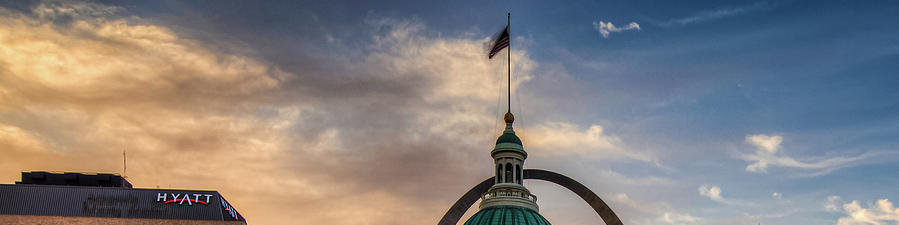

In [9]:
# slice the image
new_h = int(height/4)
new_img = img_array[:new_h,:,:]

display(Image.fromarray(new_img))

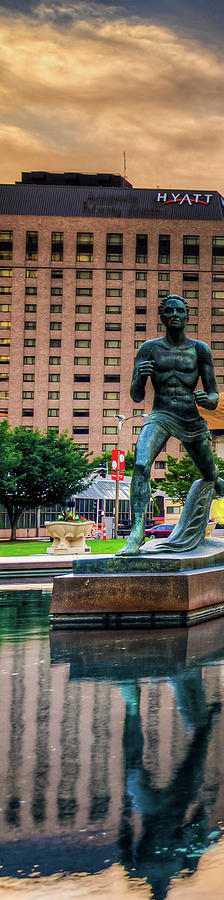

In [10]:
# slice in the other direction
new_w = int(width/4)
new_img = img_array[:,:new_w,:]

display(Image.fromarray(new_img))

In [11]:
new_img.shape

(900, 224, 3)

In [12]:
# img_array[900,0:10,:]

## Random box in image

Random box: [0:271,611:761]


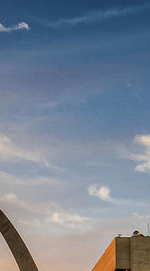

In [98]:
# could possibly turn this into a function that returns a dict
#   def rand_box(img_array, h_size=100, w_size=100):
h_size = 300
w_size = 150
height,width,bands = img_array.shape

# random positions
rand_h_pos = randint(1, height)
rand_w_pos = randint(1, width)

box_h1 = int(rand_h_pos-(h_size/2))
box_h2 = int(rand_h_pos+(h_size/2))

box_w1 = int(rand_w_pos-(w_size/2))
box_w2 = int(rand_w_pos+(w_size/2))

# make sure new coords are within image bounds
if box_h1 < 0: box_h1 = 0
if box_w1 < 0: box_w1 = 0
if box_h2 > height: box_h2 = height
if box_w2 > width: box_w2 = width
    
print("Random box: [{}:{},{}:{}]".format(box_h1,box_h2,box_w1,box_w2))

rand_img_piece = img_array[box_h1:box_h2,box_w1:box_w2,:]
display(Image.fromarray(rand_img_piece))
    
#     return rand_img_piece

## Transform the random box

In [99]:
rand_box_avg = int(np.average(rand_img_piece))

In [100]:
# change all values in the box to the average

shape = (box_h2-box_h1,box_w2-box_w1,3)
value = rand_box_avg
print(shape)
rand_box_xform = np.empty(shape, dtype=int)
rand_box_xform.fill(value)

(271, 150, 3)


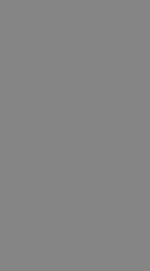

In [101]:
Image.fromarray((rand_box_xform * 1).astype(np.uint8)).convert('RGB')

In [74]:
# need to do this on a per-band basis

### References 

https://realpython.com/image-processing-with-the-python-pillow-library/

https://datagy.io/python-return-multiple-values/